In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import googletrans
from googletrans import Translator
Sewol_kr = pd.read_csv('./sewol.csv',encoding='utf-8')
translator = Translator()
# make a deep copy of the data frame
Sewol = Sewol_kr.copy()
# translate columns' name using rename function
Sewol.rename(columns=lambda x: translator.translate(x).text, inplace=True)
Sewol['gender'] = np.where(pd.notnull(Sewol['gender']),Sewol['gender'],Sewol['Gender estimation'])
Sewol = Sewol.drop(['Gender estimation'],axis=1)
Sewol = Sewol.iloc[:,:7]
translations = {}
for column in Sewol.columns:
    # unique elements of the column
    unique_elements = Sewol[column].unique()
    for element in unique_elements:
        # add translation to the dictionary
        translations[element] = translator.translate(element).text
Sewol.replace(translations, inplace = True)
Sewol['age'] = Sewol_kr['나이']
Sewol.rename(columns = {'Lifewater' : 'survival'}, inplace = True)
Sewol.head()

,Main Category,Median,Mistress,floor,location,survival,gender,age
0,sailor,Deck,Shift captain,5,front,survival,male,69.0
1,sailor,Deck,1,5,front,survival,male,42.0
2,sailor,Deck,"1st,",5,front,survival,male,34.0
3,sailor,Deck,2nd sailor,5,front,survival,male,47.0
4,sailor,Deck,"3,",5,front,survival,female,26.0


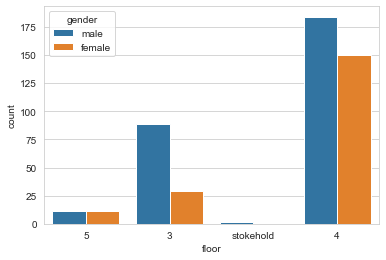

In [51]:
Sewol['age'] = Sewol['age'].fillna(np.round(Sewol['age'].mean()))

sns.set_style('whitegrid')
sns.countplot(x="floor", hue="gender", data=Sewol)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

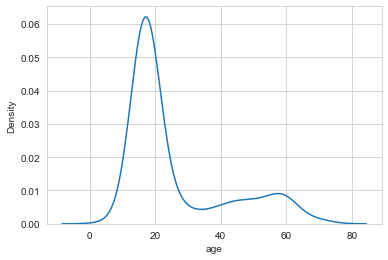

In [53]:
sns.kdeplot(Sewol['age'])

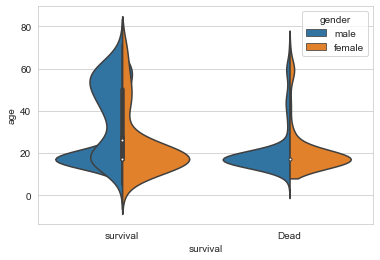

In [66]:
sns.violinplot(data=Sewol, y='age', hue='gender', split='true')
sns.violinplot(data=Sewol, y='age', hue='gender',split='true',x='survival')
plt.show()

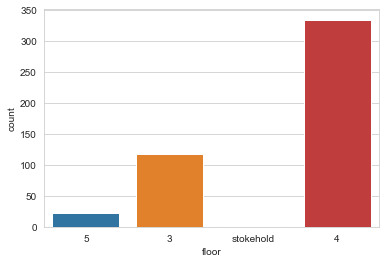

In [61]:
sns.countplot(x="floor", data=Sewol)
plt.show()

In [57]:
Sewol_kr.iloc[:,:7].head()

,대분류,중분류,소분류,층,위치,생사,성별
0,선원,갑판부,교대선장,5,앞,생존,남
1,선원,갑판부,1등 항해사,5,앞,생존,남
2,선원,갑판부,1등 항해사(견습),5,앞,생존,남
3,선원,갑판부,2등 항해사,5,앞,생존,남
4,선원,갑판부,3등 항해사,5,앞,생존,여


In [64]:
sns.heatmap(Sewol[['gender'],['floor']], cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

TypeError: '(['gender'], ['floor'])' is an invalid key